In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [19]:
UNSW_NB15 = pd.read_csv("UNSW_NB15_Modified.csv")
plt.style.use('seaborn-v0_8-darkgrid')
fig = plt.figure(figsize=(18, 12))

<Figure size 1800x1200 with 0 Axes>

Text(0.5, 0, 'Count')

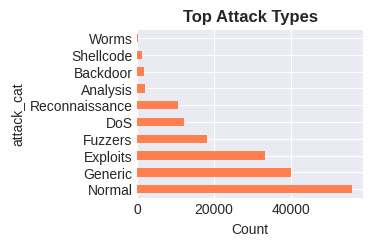

In [20]:
# THe distribution of attack types in UNSW_NB15
ax1 = plt.subplot(2, 2, 1)
UNSW_NB15['attack_cat'].value_counts().head(10).plot(kind='barh', ax=ax1, color='coral')
ax1.set_title('Top Attack Types', fontweight='bold')
ax1.set_xlabel('Count')

[Text(0, 0, '-'),
 Text(1, 0, 'dns'),
 Text(2, 0, 'http'),
 Text(3, 0, 'smtp'),
 Text(4, 0, 'ftp-data'),
 Text(5, 0, 'ftp'),
 Text(6, 0, 'ssh'),
 Text(7, 0, 'pop3'),
 Text(8, 0, 'dhcp'),
 Text(9, 0, 'other')]

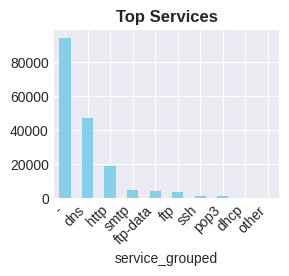

In [21]:
# Next let's visualize service distribution
ax2 = plt.subplot(2, 2, 2)
UNSW_NB15['service_grouped'].value_counts().head(10).plot(kind='bar', ax=ax2, color='skyblue')
ax2.set_title('Top Services', fontweight='bold')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

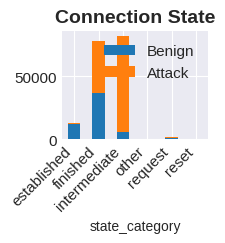

In [18]:
# Connection state graph
ax3 = plt.subplot(3, 3, 3)
pd.crosstab(UNSW_NB15['state_category'], UNSW_NB15['is_attack']).plot(kind='bar', stacked=True, ax=ax3)
ax3.set_title('Connection State', fontweight='bold', fontsize=14)
ax3.legend(['Benign', 'Attack'], fontsize=11)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right', fontsize=11)
ax3.tick_params(labelsize=11)